In [1]:
#imporitng Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
#Mount google drive to google colab 
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
#import training dataset from google drive 
StockData = pd.read_csv("/content/gdrive/My Drive/Google stock price dataset/Google_train_data.csv")
StockData.head()  #Gives first five rows of the dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
#data Visualization
StockData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [9]:
StockData["Close"]=pd.to_numeric(StockData.Close,errors='coerce')
StockData = StockData.dropna()
trainData = StockData.iloc[:,4:5].values

*1. The first line of code converts the "Close" column in the "StockData" dataframe to numeric data type using the pandas "to_numeric()" function. The "errors" parameter is set to "coerce", which means that if there are any non-numeric values in the column, they will be converted to NaN (Not a Number) values.*

*2. The second line drops any rows in the "StockData" dataframe that contain NaN values using the pandas "dropna()" function. This is done to ensure that the data is clean and ready for analysis.*

*3. The third line creates a new dataframe called "trainData" that contains only the "Close" column of the "StockData" dataframe. The ".iloc" function is used to select the columns by their numerical indices. The ":,4:5" notation means that we want all rows (represented by the ":" before the comma) and the column with index 4 (represented by "4:5" after the comma). The resulting "trainData" dataframe will contain only the "Close" column data.*

In [10]:
#data Visualization after process
StockData.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [11]:
sc = MinMaxScaler(feature_range=(0,1)) # MinMaxScaler object called "sc". The "feature_range" parameter is set to (0, 1), which means that the data will be scaled to values between 0 and 1.
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [12]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
#1 represents the number of features in the input data (in this case, there is only one feature).
X_train.shape

(1089, 60, 1)

In [14]:
#The model consists of four LSTM layers and a dense output layer.
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

*The "Dropout" layer is used to randomly drop out a fraction of the input units during training, which can help prevent overfitting.*

*The final two lines of code add a dense output layer with one output unit and compile the model. The "optimizer" parameter is set to "adam", which is an algorithm for stochastic gradient descent. The "loss" parameter is set to "mean_squared_error", which is a common loss function used in regression problems.*

In [16]:
#epochs: The number of times to iterate over the entire training dataset.
#batch_size: The number of samples to use in each batch for training. The model weights are updated after each batch.
#verbose: The level of logging during training. A value of 2 means that progress bars will be displayed for each epoch.
train_model = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0042 - 9s/epoch - 269ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0045 - 8s/epoch - 243ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0050 - 8s/epoch - 232ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0052 - 9s/epoch - 267ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0041 - 7s/epoch - 209ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0036 - 9s/epoch - 263ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0037 - 7s/epoch - 207ms/step
Epoch 8/20
35/35 - 9s - loss: 0.0034 - 9s/epoch - 261ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0043 - 9s/epoch - 248ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0035 - 8s/epoch - 220ms/step
Epoch 11/20
35/35 - 9s - loss: 0.0039 - 9s/epoch - 263ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0033 - 7s/epoch - 207ms/step
Epoch 13/20
35/35 - 9s - loss: 0.0036 - 9s/epoch - 262ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0033 - 7s/epoch - 208ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0031 - 9s/epoch - 259ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0032 - 9s/epoch - 250ms/step
Epoch 17/20
35/35

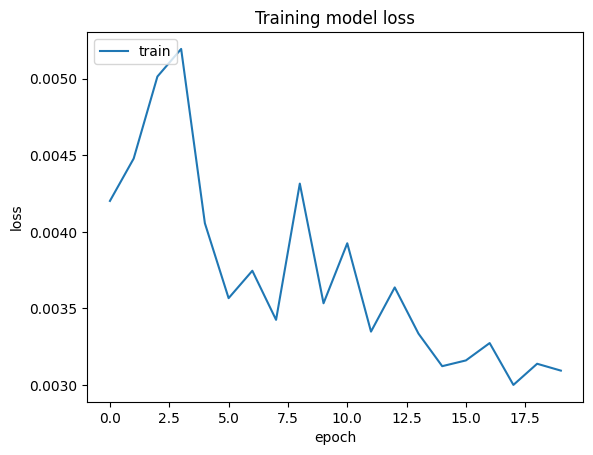

In [17]:
plt.plot(train_model.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
#import test dataset from google drive 
testData = pd.read_csv("/content/gdrive/My Drive/Google stock price dataset/Google_test_data.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [19]:
#stock price prediction
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 3s 71ms/step


array([[1.2449507],
       [1.2532557],
       [1.3114015],
       [1.317386 ],
       [1.2904965],
       [1.239468 ],
       [1.221316 ],
       [1.2320807],
       [1.2698122],
       [1.2801688],
       [1.2218249],
       [1.2049022],
       [1.2189726],
       [1.2102132],
       [1.2382569],
       [1.2445065],
       [1.2992687],
       [1.3207108],
       [1.3301796],
       [1.346081 ],
       [1.2668643],
       [1.2709917],
       [1.2336122],
       [1.2308806],
       [1.2521464],
       [1.2787801],
       [1.2838401],
       [1.2532758],
       [1.203657 ],
       [1.2032496],
       [1.2016442],
       [1.18482  ],
       [1.1384745],
       [1.1144079],
       [1.1870165],
       [1.2343286],
       [1.2362934],
       [1.2250385],
       [1.2306978],
       [1.1936707],
       [1.2518983],
       [1.2783376],
       [1.2952571],
       [1.2952477],
       [1.2870208],
       [1.2658018],
       [1.2432151],
       [1.284677 ],
       [1.3088783],
       [1.3275132],


In [20]:
#This line of code transforms the predicted output values from their scaled range back to their original scale.
predicted_price = sc.inverse_transform(y_pred)

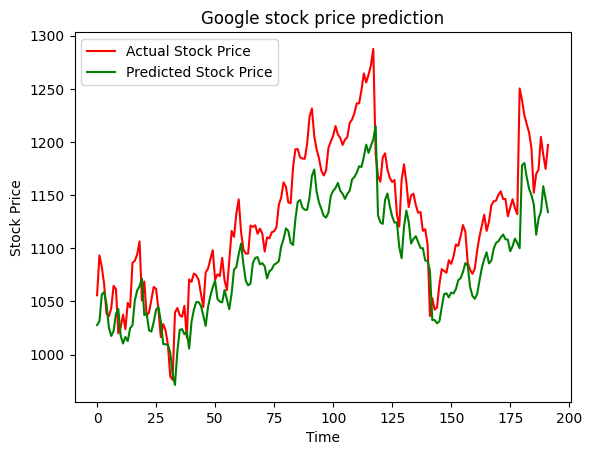

In [21]:
#compare the visualization of the predicted stock price and actual stock price graph by using matplotlib  
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()